# Example of high-level interface

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
from tqdm import tqdm
from itertools import compress
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [2]:
DEVICE = 'cpu'#'cuda:0'
SIGMA=0.006

## Toy generative model

In [3]:
def model(z):
    T = np.array([[1, 1.], [0, 1.], [0, 1.]])
    #n = np.random.randn(3)*sigma
    x = T.dot(z) #+ n
    return x

In [4]:
def noisemodel(x, z = None, noiselevel = 1.):
    n=np.random.randn(3)*SIGMA
    return x+n

## Mock data generation

In [5]:
z0 = np.array([0.4, 0.6])
x0 = noisemodel(model(z0))
print(x0, z0)

[1.00136964 0.60616134 0.59496249] [0.4 0.6]


## Automatic inference 1-dim and 2-dim posteriors

In [6]:
sw = swyft.SWYFT(x0, model, zdim = 2, device = DEVICE, head = None, noisemodel = noisemodel)

In [7]:
#sw.run(nrounds = 4, max_epochs = 20, early_stopping_patience = 3, nsamples = 2500, nbatch = 32, recycle_net = False, threshold = 1e-8)
sw.run(nworkers=0,nrounds = 4, max_epochs = 20, early_stopping_patience = 3, nsamples = 2500, nbatch = 32, recycle_net = False, threshold = 1e-6)

Adding simulations:  62%|██████▏   | 1552/2487 [00:00<00:00, 15511.62it/s]

Adding 2487 new samples.


Adding simulations: 100%|██████████| 2487/2487 [00:00<00:00, 15076.56it/s]


Start training
LR iteration 0
Total epochs: 15
Validation losses: [1.5910120829939842, 1.0998965241014957, 0.9329549372196198, 0.8579785972833633, 0.8692863527685404, 0.8307585557922721, 0.8776728045195341, 0.7947919350117445, 0.8791860155761242, 0.7202500142157078, 0.8916549668647349, 0.6395064927637577, 0.7932986039668322, 0.6548080295324326, 0.7313881032168865]
LR iteration 1
Total epochs: 4
Validation losses: [0.5876208674162626, 0.6014899252913892, 0.6119939014315605, 0.6083260932937264]
LR iteration 2
Total epochs: 4
Validation losses: [0.5153861530125141, 0.5518634049221873, 0.6022037100046873, 0.5594614259898663]


Adding simulations:   0%|          | 0/2400 [00:00<?, ?it/s]

Adding 2400 new samples.


Extracting samples.: 100%|██████████| 4887/4887 [00:00<00:00, 31303.64it/s]


Extracted 4887 samples
Start training
LR iteration 0
Total epochs: 7
Validation losses: [2.642177291214466, 2.6979029923677444, 2.4629644080996513, 2.408534027636051, 2.666043385863304, 2.436692178249359, 2.467318892478943]
LR iteration 1
Total epochs: 6
Validation losses: [2.3867773041129112, 2.41117449849844, 2.27129577845335, 2.3193025439977646, 2.2938546240329742, 2.328065775334835]
LR iteration 2
Total epochs: 8
Validation losses: [2.4222922772169113, 2.370754674077034, 2.2519822493195534, 2.2517140582203865, 2.1822230741381645, 2.4243019297719, 2.3551415875554085, 2.29679024964571]


Extracting samples.:   0%|          | 0/5422 [00:00<?, ?it/s]

Adding 535 new samples.


Extracting samples.: 100%|██████████| 5422/5422 [00:00<00:00, 26274.70it/s]


Extracted 5422 samples
Start training
LR iteration 0
Total epochs: 6
Validation losses: [2.8676207214593887, 2.6282368153333664, 2.4607629999518394, 2.596969000995159, 2.481898419559002, 2.5169943496584892]
LR iteration 1
Total epochs: 10
Validation losses: [2.5200536996126175, 2.414560452103615, 2.550531357526779, 2.386176995933056, 2.4277633875608444, 2.4256521910429, 2.356118068099022, 2.5283417850732803, 2.364104062318802, 2.4942225217819214]
LR iteration 2
Total epochs: 4
Validation losses: [2.3286296352744102, 2.428509585559368, 2.371482416987419, 2.345095969736576]


Extracting samples.:  99%|█████████▉| 5396/5463 [00:00<00:00, 28147.50it/s]

Adding 41 new samples.


Extracting samples.: 100%|██████████| 5463/5463 [00:00<00:00, 26705.57it/s]


Extracted 5463 samples
Start training
LR iteration 0
Total epochs: 11
Validation losses: [2.834363706409931, 2.7672872245311737, 2.585406705737114, 2.604019783437252, 2.5231884717941284, 2.7179932966828346, 2.467597544193268, 2.452767461538315, 2.558778941631317, 2.6018920987844467, 2.6160977855324745]
LR iteration 1
Total epochs: 5
Validation losses: [2.5795670077204704, 2.4247741401195526, 2.4807624518871307, 2.4597678631544113, 2.4762650206685066]
LR iteration 2
Total epochs: 7
Validation losses: [2.4439369663596153, 2.5030503273010254, 2.51896283775568, 2.3359803557395935, 2.3719217255711555, 2.3766730055212975, 2.473931685090065]


In [10]:
sw.comb([[0, 1]],nworkers=0)

Start training
LR iteration 0
Total epochs: 48
Validation losses: [0.6212156435940415, 0.5287411583121866, 0.5682034289930016, 0.4645854327827692, 0.5863949994090945, 0.5108353324467316, 0.6373213288607076, 0.6105805117404088, 0.478371916571632, 0.6848365896730684, 0.5741769701708108, 0.642731546307914, 0.5125322364037856, 0.7899065590463579, 0.539326687110588, 0.6797913599293679, 0.46466524951392785, 0.5317135301884264, 0.4509663421777077, 0.5042397932847962, 0.4789151885197498, 0.5354605693137273, 0.5261788199422881, 0.5273729861946777, 0.35928552981931716, 0.6214698393596336, 0.5504299033200368, 0.3571661487221718, 0.46896160126198083, 0.48929873143788427, 0.49948394077364355, 0.47897978697437793, 0.567901530303061, 0.4932774390326813, 0.4883258798508905, 0.5081347093801014, 0.682851757039316, 0.579210699419491, 0.4818255826830864, 0.4154657748294994, 0.44391515175811946, 0.46843732480192557, 0.5339096176903695, 0.48348644544603303, 0.5035399284679443, 0.5434958747937344, 0.38940385

## Plot posteriors

In [8]:
# Fisher analysis
NDIM=2
grad = []
for i in range(0, NDIM):
    dz = np.zeros(NDIM)
    d = 0.001
    dz[i] += d
    g = (model(z0+dz) - model(z0))/d
    grad.append(g)

I = np.zeros((NDIM, NDIM))

for i in range(NDIM):
    for j in range(NDIM):
        I[i, j] = (grad[i]*grad[j]).sum()/SIGMA**2
              
Cov = np.linalg.inv(I)
err = np.diag(Cov)**0.5
print(err)

[0.00734847 0.00424264]


0.9829032435860902 1.8739703770912883
0.9719744932269907 1.850506002020243


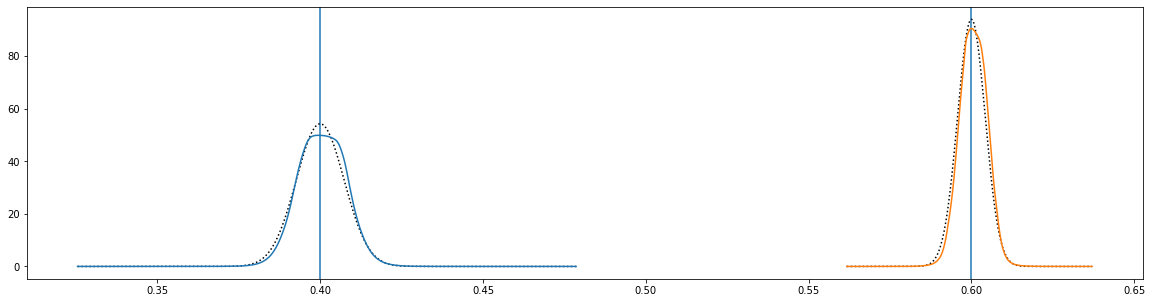

In [9]:
plt.figure(figsize=(20, 5))
for i in range(2):
    z, p = sw.posterior(i, version = -1)
    plt.axvline(z0[i])
    plt.plot(z, stats.norm.pdf(z, z0[i], err[i]), 'k:')
    plt.plot(z, p)
    s = swyft.get_stats(z, p)
    print(s['err68']/err[i], s['err95']/err[i])
#plt.xlim([0.3, 0.7])

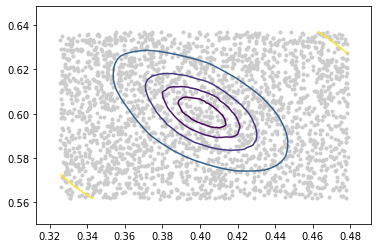

In [11]:
zgrid, lnLgrid = sw.posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], -lnLgrid+max_lnL, levels = [1, 4, 9, 16, 50])
#plt.xlim([0, 1])
#plt.ylim([0, 1])